In [55]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.calibration import CalibrationDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


In [86]:
df = pd.read_csv("vehicle_loan_data.csv")
df.columns

Index(['loanDefault', 'age', 'disbursedAmount', 'assetCost', 'itv',
       'mobilenoAvlFlag', 'aadharFlag', 'panFlag', 'voteridFlag',
       'drivingFlag', 'passportFlag', 'performCnsScore', 'priNoOfAccts',
       'priActiveAccts', 'priOverdueAccts', 'priCurrentBalance',
       'priSanctionedAmount', 'priDisbursedAmount', 'secNoOfAccts',
       'secActiveAccts', 'secOverdueAccts', 'secCurrentBalance',
       'secSanctionedAmount', 'secDisbursedAmount', 'primaryInstalAmt',
       'secInstalAmt', 'newAcctsInLastSixMonths',
       'delinquentAcctsInLastSixMonths', 'averageAcctAge',
       'creditHistoryLength', 'noOfInquiries', 'salaried', 'selfEmployed',
       'unknown'],
      dtype='object')

In [87]:
df = StandardScaler().fit(df).transform(df)

In [89]:
df[0] = np.int8(df[0])
df = pd.DataFrame(df)
df.columns = ['loanDefault', 'age', 'disbursedAmount', 'assetCost', 'itv',
       'mobilenoAvlFlag', 'aadharFlag', 'panFlag', 'voteridFlag',
       'drivingFlag', 'passportFlag', 'performCnsScore', 'priNoOfAccts',
       'priActiveAccts', 'priOverdueAccts', 'priCurrentBalance',
       'priSanctionedAmount', 'priDisbursedAmount', 'secNoOfAccts',
       'secActiveAccts', 'secOverdueAccts', 'secCurrentBalance',
       'secSanctionedAmount', 'secDisbursedAmount', 'primaryInstalAmt',
       'secInstalAmt', 'newAcctsInLastSixMonths',
       'delinquentAcctsInLastSixMonths', 'averageAcctAge',
       'creditHistoryLength', 'noOfInquiries', 'salaried', 'selfEmployed',
       'unknown']

In [ ]:
df.to_csv("vehicle_loan_data.csv", index = False)

In [62]:
X = df[:, 1:]
y = df[:, 0]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = np.int8(y_train)
y_test = np.int8(y_test)

In [66]:
clf = LogisticRegression(random_state=0, 
                         n_jobs = 16,
                         penalty = 'l2',
                         C = 1e6
                        ).fit(X_train, y_train)

In [67]:
clf.score(X_train, y_train)

0.7823807251652611

In [68]:
clf.score(X_test, y_test)

0.7832772190173919

/home/j1feng/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


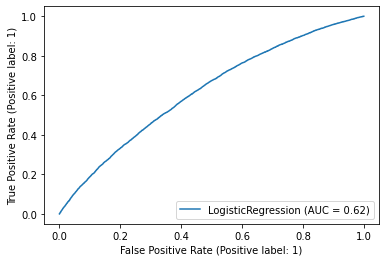

In [69]:
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

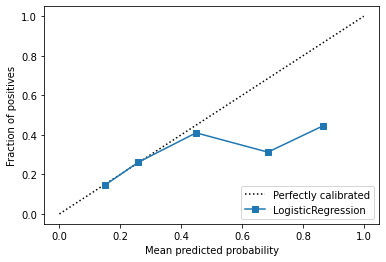

In [70]:
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_estimator(clf, X_test, y_test)
plt.show()